# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

## Importing Dataset and Data Munging

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
## Load the data into a DataFrame
df = pd.read_csv('../Resources/Iowa_Liquor_sales_sample_10pct_train.csv')

### Filling in missing values in County Names

In [155]:
#fixing missing county names
cc = df.set_index('City')['County'].to_frame()
cc.dropna(inplace=True)
undefined = pd.DataFrame([['Wayne'],['Polk'],['Fremont']], columns=['County'], index=['SEYMOUR', 'RUNNELLS', 'TABOR'])
df2 = pd.concat([cc, undefined])

def get_county(city):
    return df2.T[city].values[0][0]


In [156]:
citys_wo_county = df[pd.isnull(df["County"])]["City"].to_frame()
for row in citys_wo_county.index:
    df.set_value(row, 'County', get_county(citys_wo_county.ix[row]['City']))

In [162]:
df[(df['County']=='W') | (df['County']=='P') | (df['County']=='F')]

,Unnamed: 0,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)


In [161]:
df.ix[2073,'County'] = 'Wayne'
df.ix[5842,'County'] = 'Wayne'
df.ix[70366,'County'] = 'Wayne'
df.ix[72786,'County'] = 'Polk'
df.ix[73473,'County'] = 'Fremont'
df.ix[96871,'County'] = 'Wayne'
df.ix[104910,'County'] = 'Wayne'
df.ix[113314,'County'] = 'Polk'
df.ix[121184,'County'] = 'Polk'
df.ix[136231,'County'] = 'Wayne'
df.ix[139566,'County'] = 'Fremont'
df.ix[188113,'County'] = 'Fremont'

### Filling in missing values in Category Names

In [163]:
#fixing missing categories
cat = df.set_index('Category')['Category Name'].to_frame()
cat.dropna(inplace=True)
undefined_cats = pd.DataFrame([["Moonshine"],["Reposado"],["Vodka"],["Hennessy"],["Spiced Rum"],["Rum"],["Amaretto"],["Spirit"],["Moonshine"],["Moonshine"],["Rum"]], columns=['Category Name'], index=['1011700.0', '1022200.0', '1032100.0', '1052100.0', '1062400.0', '1062500.0', '1082100.0', '1082200.0', '1091100.0', '1091300.0', '1092100.0'])
all_cats = pd.concat([cat, undefined_cats])

def get_category_name(category):
    return all_cats.T[str(float(category))].values[0]

In [164]:
category_wo_name = df[pd.isnull(df["Category Name"])]["Category"].to_frame()

for row in category_wo_name.index:
    if not np.isnan(category_wo_name.ix[row]['Category']):
        df.set_value(row, 'Category Name', get_category_name(category_wo_name.ix[row]['Category']))

In [165]:
del df['County Number']
print df.shape

(243859, 18)


In [166]:
#converting to datetime
df["Date"] = pd.to_datetime(df["Date"])

In [167]:
del df['Category']

In [176]:
#removing $ and converting to float
df['State Bottle Cost'] = df['State Bottle Cost'].apply(lambda x: str(x).replace('$','')).astype(float)
df['State Bottle Retail'] = df['State Bottle Retail'].apply(lambda x: str(x).replace('$','')).astype(float)
df['Sale (Dollars)'] = df['Sale (Dollars)'].apply(lambda x: str(x).replace('$','')).astype(float)

In [177]:
#only using the 2015 year data
df = df[df['Date'].dt.year == 2015]

### Creating Train/Test Split

In [178]:
df_y = df['Sale (Dollars)']
df_X = df.drop(["Sale (Dollars)"], axis=1)

In [179]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=.33)

#### Concatenating X_train and Y_train for Analysis

In [180]:
train = pd.concat([X_train,y_train],axis = 1)

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [181]:
train.head()

,Unnamed: 0,Date,Store Number,City,Zip Code,County,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),Sale (Dollars)
159548,242614,2015-03-16,3644,ALTOONA,50009,Polk,STRAIGHT RYE WHISKIES,255,27102,Templeton Rye,750,18.09,27.14,6,4.50,1.19,162.84
60695,38319,2015-08-05,2625,DAVENPORT,52804,Scott,AMERICAN COCKTAILS,308,71529,Tooters Ala Bama Slama,375,5.75,8.63,7,2.62,0.69,60.41
140172,136592,2015-11-18,2622,IOWA CITY,52240,Johnson,STRAIGHT RYE WHISKIES,255,27102,Templeton Rye,750,18.09,27.14,30,22.50,5.94,814.20
152955,28046,2015-09-16,4324,DAYTON,50530,Webster,VODKA FLAVORED,380,41693,Uv Blue (raspberry) Vodka,750,6.50,9.75,2,1.50,0.40,19.50
242051,76117,2015-04-15,2500,AMES,50010,Story,TEQUILA,410,88296,Patron Tequila Silver,750,27.00,40.50,12,9.00,2.38,486.00


In [182]:
train.describe()

,Unnamed: 0,Store Number,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),Sale (Dollars)
count,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000
mean,135204.350980,3578.248409,255.949458,45947.097883,925.059872,9.774727,14.680064,9.993401,9.145796,2.416262,131.517197
std,78216.536071,942.699255,141.212720,52863.249081,490.752300,6.958862,10.437927,25.845655,30.659248,8.099311,400.022485
min,0.000000,2106.000000,10.000000,173.000000,50.000000,0.890000,1.340000,1.000000,0.100000,0.030000,1.340000
25%,67488.000000,2603.000000,115.000000,26828.000000,750.000000,5.510000,8.310000,2.000000,1.600000,0.420000,30.600000
50%,134856.000000,3715.000000,260.000000,38176.000000,750.000000,8.070000,12.300000,6.000000,5.250000,1.390000,70.560000
75%,202929.500000,4346.000000,380.000000,64571.000000,1000.000000,11.920000,17.880000,12.000000,10.500000,2.770000,135.360000
max,270953.000000,9013.000000,978.000000,994992.000000,6000.000000,299.990000,449.990000,2508.000000,2508.000000,662.540000,36392.400000


In [183]:
train[train['Bottles Sold'] < 26].describe()

,Unnamed: 0,Store Number,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),Sale (Dollars)
count,126665.000000,126665.000000,126665.000000,126665.000000,126665.000000,126665.000000,126665.000000,126665.000000,126665.000000,126665.000000,126665.000000
mean,135208.166226,3574.990929,255.915825,45979.570497,928.239395,9.841760,14.780553,7.214163,6.496250,1.716301,95.189828
std,78223.155151,940.311167,141.467851,52296.137330,488.914398,6.981716,10.472024,5.900579,5.786799,1.528774,94.112245
min,0.000000,2106.000000,10.000000,173.000000,50.000000,0.890000,1.340000,1.000000,0.100000,0.030000,1.340000
25%,67449.000000,2603.000000,115.000000,26828.000000,750.000000,5.750000,8.630000,2.000000,1.500000,0.400000,29.980000
50%,134815.000000,3713.000000,260.000000,38178.000000,750.000000,8.200000,12.300000,6.000000,4.500000,1.190000,67.440000
75%,202940.000000,4345.000000,380.000000,64601.000000,1000.000000,11.960000,17.940000,12.000000,10.500000,2.770000,129.120000
max,270953.000000,9010.000000,978.000000,994992.000000,6000.000000,299.990000,449.990000,25.000000,150.000000,39.630000,3712.500000


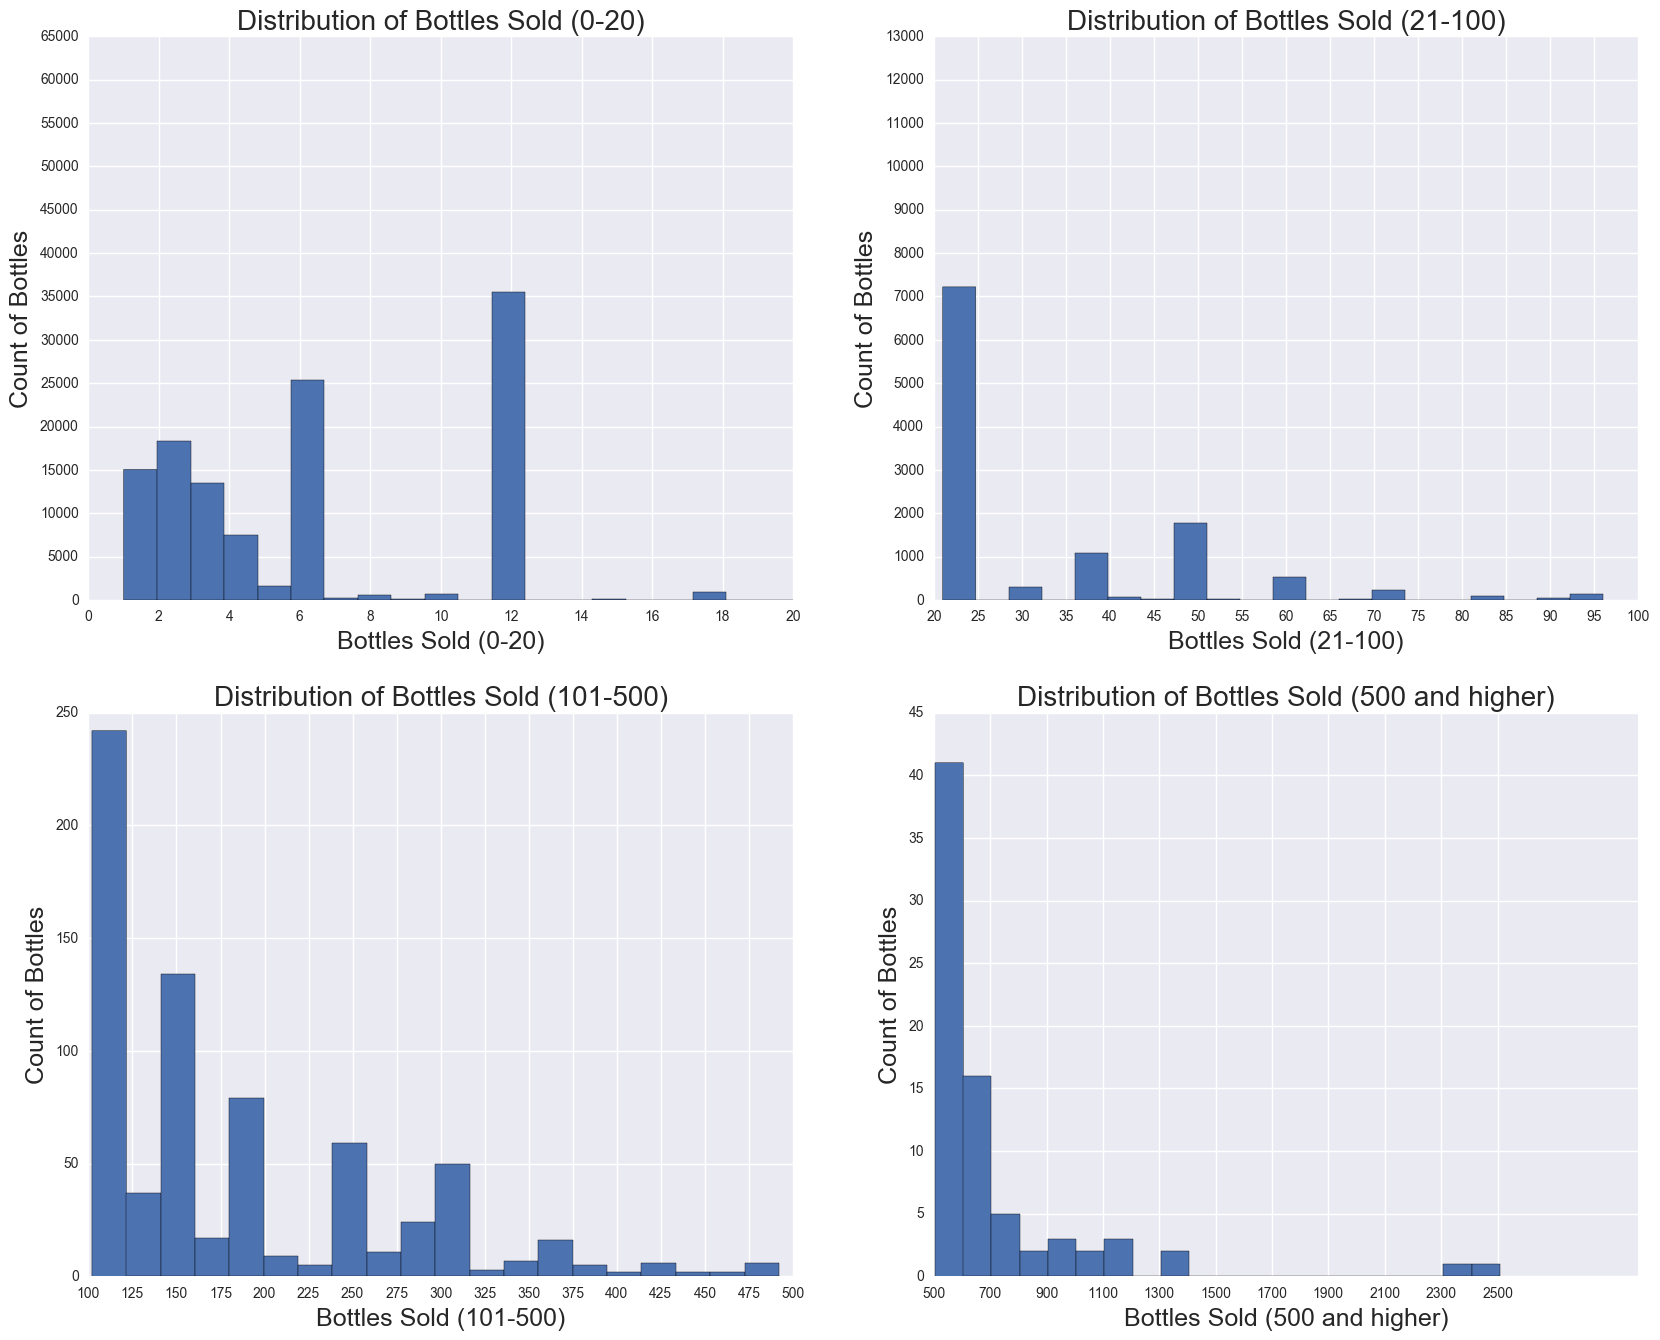

In [184]:
#evaluating bottles sold
fig, axes = plt.subplots(2,2, figsize=(20,16))
#Bottles Sold less than or equal to 10
axes[0][0].hist(x = train[X_train['Bottles Sold']<=20]['Bottles Sold'],bins = 20) 
axes[0][0].xaxis.set_ticks(np.arange(0, 21, 2))
axes[0][0].yaxis.set_ticks(np.arange(0, 70000, 5000))
axes[0][0].set_title('Distribution of Bottles Sold (0-20)',fontsize = 20)
axes[0][0].set_xlabel('Bottles Sold (0-20)',fontsize = 18)
axes[0][0].set_ylabel('Count of Bottles',fontsize = 18)
#Bottles Sold more than 10 and less than or equal to 100
axes[0][1].hist(x = train[(X_train['Bottles Sold']>20) & (train['Bottles Sold']<=100)]['Bottles Sold'],bins = 20)
axes[0][1].xaxis.set_ticks(np.arange(20, 101, 5))
axes[0][1].yaxis.set_ticks(np.arange(0, 14000, 1000))
axes[0][1].set_title('Distribution of Bottles Sold (21-100)',fontsize = 20)
axes[0][1].set_xlabel('Bottles Sold (21-100)',fontsize = 18)
axes[0][1].set_ylabel('Count of Bottles',fontsize = 18)
#Bottles Sold more than 100 and less than or equal to 500
axes[1][0].hist(x = train[(X_train['Bottles Sold']>100) & (train['Bottles Sold']<=500)]['Bottles Sold'],bins=20)
axes[1][0].xaxis.set_ticks(np.arange(100, 501, 25))
axes[1][0].set_title('Distribution of Bottles Sold (101-500)',fontsize = 20)
axes[1][0].set_xlabel('Bottles Sold (101-500)',fontsize = 18)
axes[1][0].set_ylabel('Count of Bottles',fontsize = 18)
#Bottles Sold more than 500 and less than or equal to 2700
axes[1][1].hist(x = train[(X_train['Bottles Sold']>500) & (train['Bottles Sold']<=2700)]['Bottles Sold'],bins = 20)
axes[1][1].xaxis.set_ticks(np.arange(500, 2700, 200))
axes[1][1].set_title('Distribution of Bottles Sold (500 and higher)',fontsize = 20)
axes[1][1].set_xlabel('Bottles Sold (500 and higher)',fontsize = 18)
axes[1][1].set_ylabel('Count of Bottles',fontsize = 18);

In [185]:
#creating total cost column
tot_cost = train['Bottles Sold']*train['State Bottle Cost']
insert_totcost = train.columns.get_loc('Sale (Dollars)') + 1
train.insert(insert_totcost,'Total_Cost',tot_cost)

In [186]:
#make all category names upper case
#create category bins
train['Category Name'] = train['Category Name'].apply(lambda x: str(x).upper())
category = train.groupby('Category Name')['Item Number'].nunique().to_frame()
category.reset_index(inplace = True)
#creating category bins 
cat_bins = []
for x in train['Category Name']:
    if 'VODKA' in x:
        cat_bins.append('VODKA')
    elif 'WHISKEY' in x:
        cat_bins.append('WHISKEY')
    elif 'RUM' in x:
        cat_bins.append('RUM')
    elif 'SCHNAPPS' in x:
        cat_bins.append('SCHNAPPS')
    elif 'BRANDIES' in x:
        cat_bins.append('BRANDIES')    
    elif 'GIN' in x:
        cat_bins.append('GIN') 
    elif 'SCOTCH' in x:
        cat_bins.append('SCOTCH') 
    elif 'BOURBON' in x:
        cat_bins.append('BOURBON')
    elif 'AMARETTO' in x:
        cat_bins.append('AMARETTO')         
    elif 'TEQUILA' in x:
        cat_bins.append('TEQUILA') 
    else:
        cat_bins.append('OTHER')
cat_bin_df = pd.DataFrame(cat_bins)
cat_bin_df = cat_bin_df.rename(columns = {0:'Category_Bins'})


The mean # of unique items per store is 67.3592375367
The max # of unique items per store is 536
The min # of unique items per store is 1


,Store Number,Unique_Items
0,2106,171
1,2113,60
2,2130,142
3,2152,55
4,2178,115


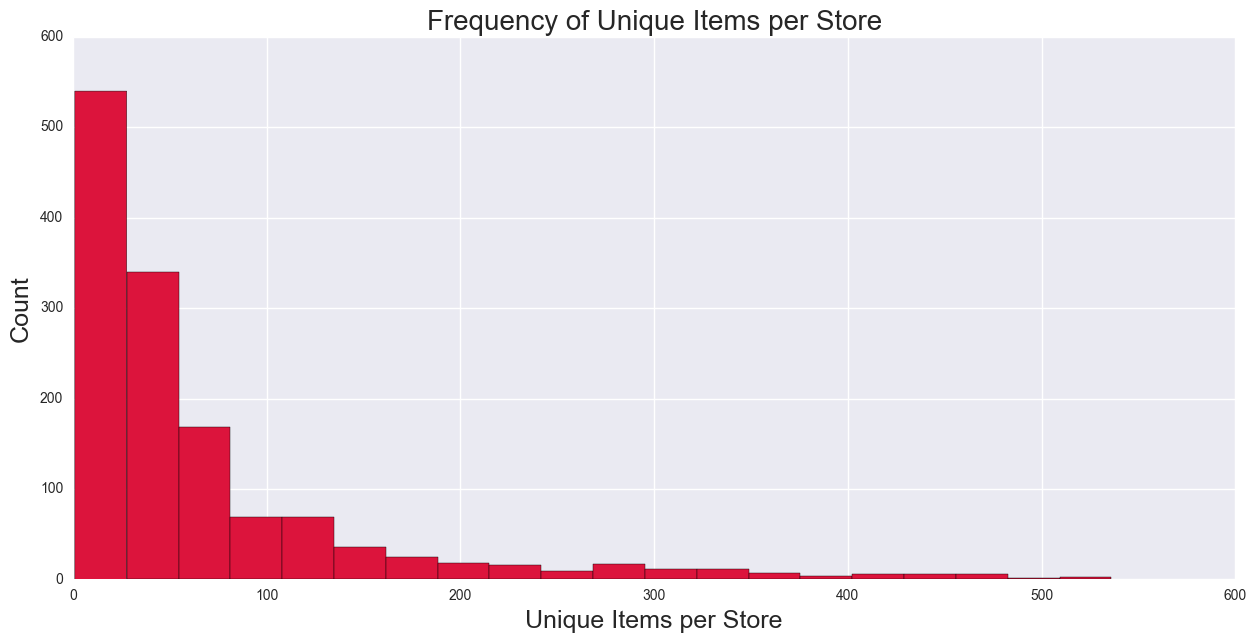

In [199]:
#creating unique items per store - possible proxy for sq footage given more items per store means a bigger store
unique_items_per_store = train[train['Bottles Sold'] < 26].groupby('Store Number')['Item Number'].nunique().to_frame('Unique_Items')
unique_items_per_store.reset_index(inplace = True)
unique_items_per_store.sort_values('Unique_Items',ascending = False)
print "The mean # of unique items per store is", unique_items_per_store['Unique_Items'].mean()
print "The max # of unique items per store is", unique_items_per_store['Unique_Items'].max()
print "The min # of unique items per store is", unique_items_per_store['Unique_Items'].min()
unique_items_per_store['Unique_Items'].hist(bins = 20, figsize = (15,7), color = 'crimson')
plt.title('Frequency of Unique Items per Store',fontsize = 20)
plt.xlabel('Unique Items per Store',fontsize = 18)
plt.ylabel('Count',fontsize = 18)
unique_items_per_store.head()

In [188]:
county_store = train.groupby(['County','Store Number'])['Zip Code'].nunique().to_frame('Count')
county_store.reset_index(inplace = True)
county_items = pd.merge(county_store,unique_items_per_store,how= 'outer')
#this is the number of unique items per store in the county. 
county_avgitems = county_items.groupby('County')['Unique_Items'].mean().to_frame('Avg_items_store')
county_avgitems.reset_index(inplace = True)
county_avgitems.head()

#creating city-store number pair and average items per store per city
city_store = train.groupby(['City','Store Number'])['Zip Code'].nunique().to_frame('Count')
city_store.reset_index(inplace = True)
city_items = pd.merge(city_store,unique_items_per_store)
city_avgitems = city_items.groupby('City')['Unique_Items'].mean().to_frame('Average_items_store')
city_avgitems.reset_index(inplace = True)


#matching up store number with store name to identify what kind of stores are liquor stores

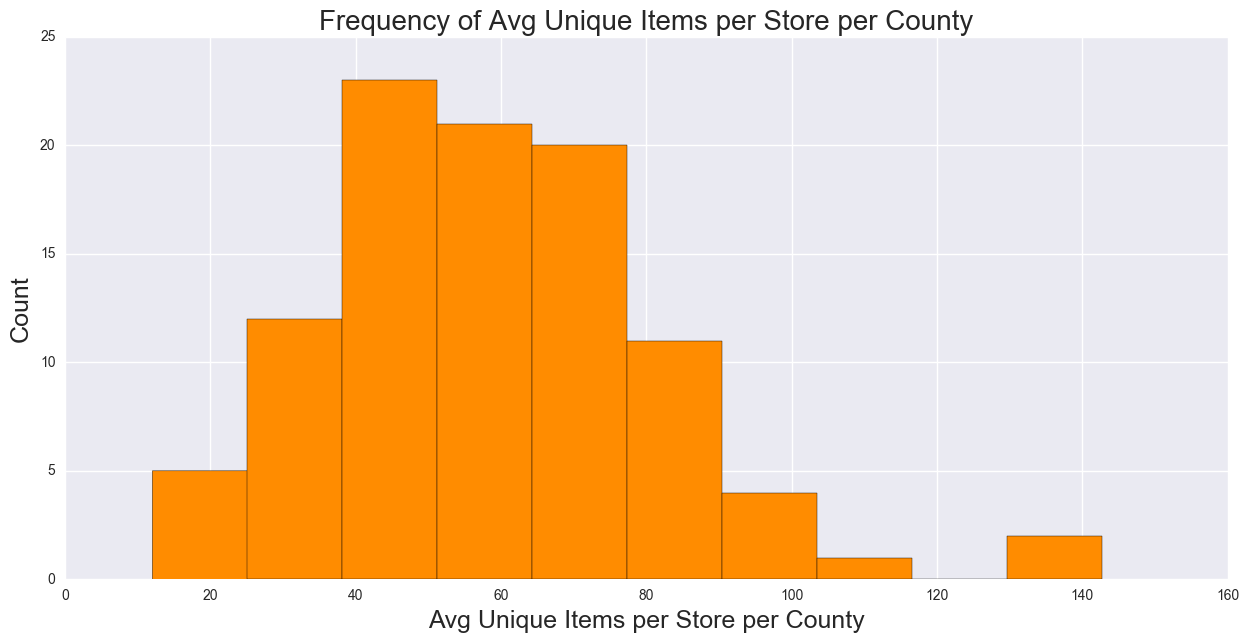

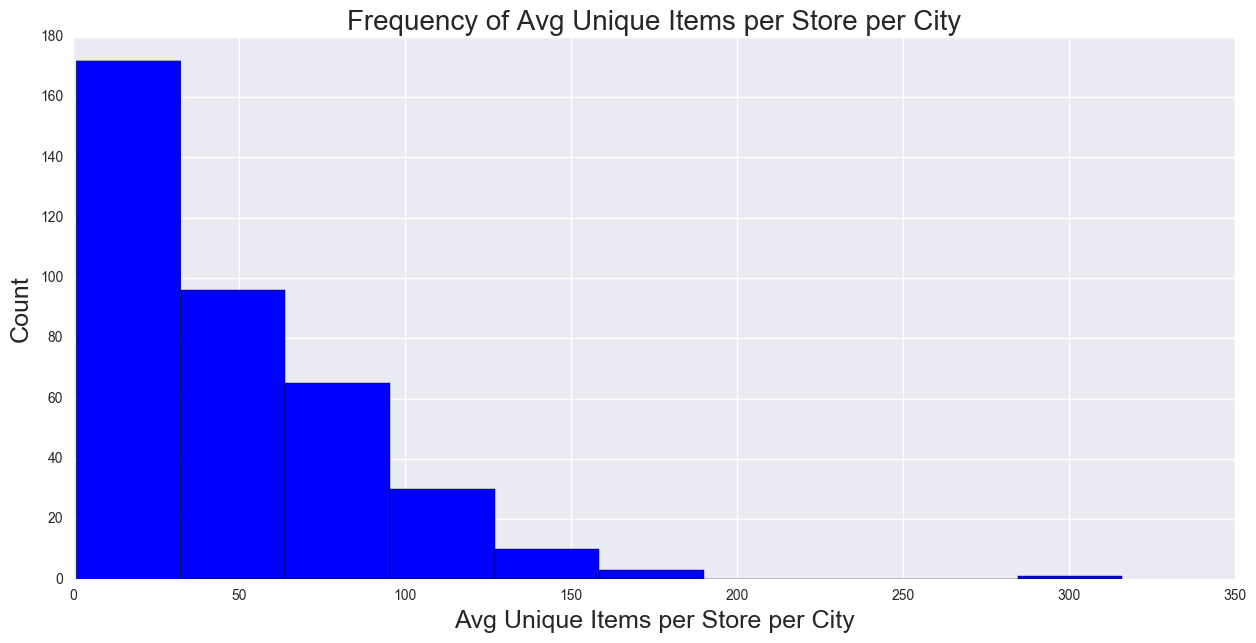

In [212]:
county_avgitems.hist(figsize = (15,7), color = 'darkorange')
plt.title('Frequency of Avg Unique Items per Store per County',fontsize = 20)
plt.xlabel('Avg Unique Items per Store per County',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

city_avgitems.hist(figsize = (15,7), color = 'blue')
plt.title('Frequency of Avg Unique Items per Store per City',fontsize = 20)
plt.xlabel('Avg Unique Items per Store per City',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

In [146]:
#creating stores per zip/city/county and county_df
stores_per_zip = train.groupby('Zip Code')['Store Number'].nunique().to_frame('Stores_per_zip')
stores_per_city = train.groupby('City')['Store Number'].nunique().to_frame('Stores_per_City')
stores_per_city.reset_index(inplace = True)
stores_per_county = train.groupby('County')['Store Number'].nunique().to_frame('Stores_per_County')
stores_per_county.reset_index(inplace = True)
#creating a county dataframe to run regression on 
county_df = train[train['Bottles Sold'] < 26].groupby('County')['Sale (Dollars)','Bottles Sold','Total_Cost'].sum()
county_df.reset_index(inplace = True)
county_df = pd.merge(county_df,stores_per_county)
county_df['AvgSales'] = county_df['Sale (Dollars)'] / county_df['Stores_per_County']
county_df.head()
county_df = pd.merge(county_df,county_avgitems)
county_df.head()
county_df.sort_values('AvgSales',ascending = False).head()

#target columns
county_target = county_df['Sale (Dollars)']/ county_df['Stores_per_County']

county_pop = pd.read_csv('../Resources/IA_Data_Master.csv')
county_pop = pd.DataFrame(county_pop)
county_df = pd.merge(county_df,county_pop,on='County',how='outer')
county_df['Pop_per_store'] = county_df['Population Estimate'] / county_df['Stores_per_County']
county_df['Pop_house_ratio'] = county_df['Population Estimate'] / county_df['Housing Estimate']
county_df['house_pop_ratio'] = county_df['Housing Estimate'] / county_df['Population Estimate']

#X's 
county_data = county_df.iloc[:,[6,7,9,10,11]]
county_df.head()

,County,Sale (Dollars),Bottles Sold,Total_Cost,Stores_per_County,AvgSales,Avg_items_store,Per Capita Yearly Income,Housing Estimate,Population Estimate,Pop_per_store,Pop_house_ratio,house_pop_ratio
0,Adair,25253.69,2151,16815.14,8,3156.711250,27.500000,25564,3671,7228,903.500000,1.968946,0.507886
1,Adams,6392.12,427,4259.18,1,6392.120000,93.000000,23707,2007,3796,3796.000000,1.891380,0.528714
2,Allamakee,40795.30,2969,27155.90,6,6799.216667,62.666667,24926,7667,13886,2314.333333,1.811139,0.552139
3,Appanoose,42292.17,3448,28172.35,6,7048.695000,71.666667,21599,6567,12529,2088.166667,1.907873,0.524144
4,Audubon,9146.20,806,6093.50,3,3048.733333,32.666667,30919,2995,5773,1924.333333,1.927546,0.518794


## Record your findings

The skewed variables are:

Avg_items_store is the average items per store for the county, it is a proxy for size of store

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

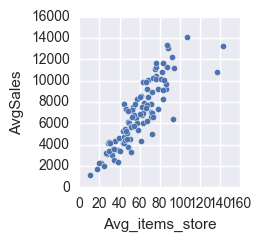

In [189]:
sns.pairplot(data = county_df,x_vars='Avg_items_store',y_vars='AvgSales')

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [190]:
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error

[ 0.92347579 -0.06600474  0.15182805  0.04324004 -0.21692564]
0.865389532604
0.0332697076519


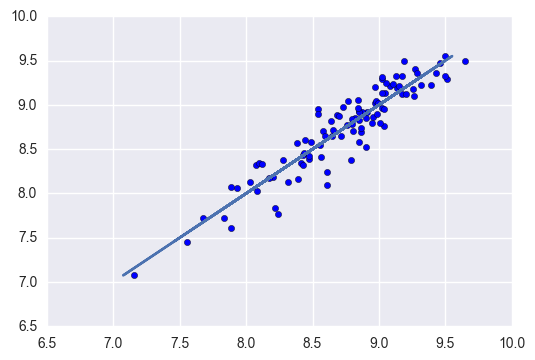

In [191]:
#this is linear regression for county_df

y = np.log(county_target)
X = np.log(county_data)

lm = linear_model.LinearRegression()

#regression for county_df
model = lm.fit(X,y)
predict = model.predict(X)
plt.scatter(predict,y)
plt.plot(y,y)
print model.coef_
print model.score(X,y)
print mean_squared_error(y,predict)
#plt.scatter(predict,predict-y)
delta = (y - pd.Series(predict))
county_df['Predict'] = pd.Series(predict)
county_df['Delta'] = delta

In [192]:
#these are top 20 counties in iowa to focus on
county_top12 = county_df.sort_values('Delta', ascending = False).head(12)
county_top12

,County,Sale (Dollars),Bottles Sold,Total_Cost,Stores_per_County,AvgSales,Avg_items_store,Per Capita Yearly Income,Housing Estimate,Population Estimate,Pop_per_store,Pop_house_ratio,house_pop_ratio,Predict,Delta
27,Delaware,38829.12,2682,25862.65,5,7765.824000,44.200000,26261,8027,17403,3480.600000,2.168058,0.461242,8.539299,0.418189
41,Hardin,95516.83,6720,63565.95,13,7347.448462,46.076923,25153,8162,17367,1335.923077,2.127787,0.469972,8.542896,0.359212
95,Winneshiek,66489.25,4851,44285.68,5,13297.850000,87.400000,25062,8838,20709,4141.800000,2.343177,0.426771,9.189060,0.306298
50,Jefferson,44318.76,3072,29524.75,4,11079.690000,75.000000,27593,7539,17555,4388.750000,2.328558,0.429450,9.020186,0.292683
87,Union,50961.68,3682,33914.99,6,8493.613333,60.333333,23007,5904,12469,2078.166667,2.111958,0.473494,8.768148,0.278922
44,Howard,32527.98,2353,21661.01,3,10842.660000,82.666667,24286,4359,9410,3136.666667,2.158752,0.463231,9.025720,0.265524
46,Ida,31753.99,2192,21150.69,4,7938.497500,64.000000,25869,3433,7028,1757.000000,2.047189,0.488475,8.727340,0.252139
40,Hancock,16494.45,1357,10966.78,4,4123.612500,28.750000,25814,5315,10974,2743.500000,2.064722,0.484327,8.073551,0.250934
64,Mills,25184.77,2071,16771.95,6,4197.461667,29.500000,27101,6080,14844,2474.000000,2.441447,0.409593,8.099157,0.243078
28,Des Moines,207847.00,15954,138405.24,21,9897.476190,63.095238,24408,18456,40055,1907.380952,2.170297,0.460766,8.973147,0.226888


[ 0.92729643 -0.11966093 -0.96583262 -0.86268883  0.34466867 -0.0604123 ]
0.810437992443
0.231111587953


,City,County,Sale (Dollars),AvgSales,Bottles Sold,Total_Cost,Stores_per_City,Average_items_store,Population,Male,...,House Value,Zip Codes,Pop_per_store,Consumption,MtoF,Male_pct,Female_pct,Houses,Predict,Delta
19,WEST BURLINGTON,Des Moines,41230.30,10307.575000,2810,27421.41,4,49.250000,3051,1351,...,96579,52655,762.750000,1.085765,0.794706,0.442806,0.557194,1820,8.578383,0.662251
6,AFTON,Union,1008.24,1008.240000,96,672.00,1,3.000000,842,382,...,76773,50830,842.000000,8.770833,0.830435,0.453682,0.546318,455,6.316172,0.599789
29,GLENWOOD,Mills,20767.52,5191.880000,1600,13825.34,4,32.000000,5242,2487,...,136395,51534,1310.500000,3.276250,0.902722,0.474437,0.525563,2197,7.967778,0.587074
10,DOWS,Wright,1147.44,1147.440000,120,764.76,1,6.000000,519,299,...,39612,50071,519.000000,4.325000,1.359091,0.576108,0.423892,340,6.569092,0.476197
30,MALVERN,Mills,1174.20,1174.200000,114,782.58,1,7.000000,1118,565,...,117712,51551,1118.000000,9.807018,1.021700,0.505367,0.494633,462,6.628665,0.439678
5,IOWA FALLS,Hardin,40320.81,8064.162000,2853,26850.26,5,50.600000,5173,2506,...,93924,50126,1034.600000,1.813179,0.939633,0.484438,0.515562,2704,8.588817,0.406368
27,MANCHESTER,Delaware,41709.57,13903.190000,2896,27756.08,3,74.666667,5087,2436,...,100050,52057,1695.666667,1.756561,0.918899,0.478868,0.521132,2716,9.222353,0.317520
20,CARROLL,Carroll,76297.54,12716.256667,5516,50787.55,6,78.833333,10007,4664,...,125573,51401,1667.833333,1.814177,0.872918,0.466074,0.533926,5714,9.143253,0.307383
13,BRITT,Hancock,8391.78,4195.890000,695,5568.39,2,28.000000,2026,942,...,73098,50423,1013.000000,2.915108,0.869004,0.464956,0.535044,1080,8.049272,0.292589
8,BELMOND,Wright,15526.05,5175.350000,1222,10336.15,3,37.666667,2322,1205,...,81163,50421,774.000000,1.900164,1.078782,0.518949,0.481051,1439,8.262853,0.288810


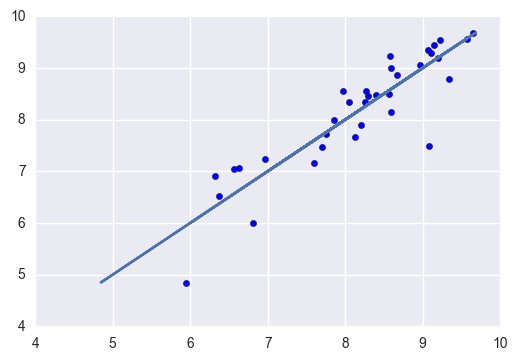

In [193]:
#building cities df to find which cities to target
city_df = train[train['Bottles Sold'] < 26].groupby(['City','County'])['Sale (Dollars)','Bottles Sold','Total_Cost'].sum()
city_df.reset_index(inplace = True)
county_top12_county = county_top12.iloc[:,0].to_frame()
city_df_top12 = pd.merge(city_df,county_top12_county,on='County')
city_df_top12
#36 cities
city_df_top12 = pd.merge(city_df_top12,stores_per_city)
city_df_top12 = pd.merge(city_df_top12,city_avgitems)
AvgSales = city_df_top12['Sale (Dollars)']/city_df_top12['Stores_per_City']
city_df_top12.insert(3,'AvgSales',AvgSales)
city_pop = pd.read_csv('../Resources/IA_Data_City_Master.csv')
city_df_top12 = pd.merge(city_df_top12,city_pop)
city_df_top12['Pop_per_store'] = city_df_top12['Population'] / city_df_top12['Stores_per_City']
city_df_top12['Consumption'] = city_df_top12['Population'] / city_df_top12['Bottles Sold']
city_df_top12.head()
#extrapolated the number of houses per city
houses_city = (city_df_top12['Population'] * (city_df_top12['Per Capita Income'] / city_df_top12['Household Income'] )).astype(int)
city_df_top12['MtoF'] = city_df_top12['Male'] / city_df_top12['Female']
city_df_top12['Male_pct'] = city_df_top12['Male'] / city_df_top12['Population']
city_df_top12['Female_pct'] = city_df_top12['Female'] / city_df_top12['Population']
city_df_top12['Houses'] = houses_city

#merging with store names
store_names = pd.read_csv('../Resources/IA_Data_Stores.csv')
store_names.head()
city_names = city_df_top12.iloc[:,0].to_frame()
city_merge_top12 = pd.merge(city_names,city_store)
city_store_merged = pd.merge(city_merge_top12, store_names)
store_type = []
liquor_list = []
grocery_list = []
other_list = []
for x in city_store_merged['Store Name']:
    if ('liquor' or 'spirits' or 'wine') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('spirits') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('wine') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('beverage') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('bottle') in x.lower():
        store_type.append('Liquor')  
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('vineyard') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('beer') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif 'hy-vee' in x.lower():
        store_type.append('Grocery')
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'fareway' in x.lower():
        store_type.append('Grocery')
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'target'in x.lower():
        store_type.append('Grocery') 
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'wal-mart' in x.lower():
        store_type.append('Grocery') 
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'food' in x.lower():
        store_type.append('Grocery')
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'supermarket' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    else:
        store_type.append('Other')
        liquor_list.append(0)
        grocery_list.append(0)
        other_list.append(1)
city_store_merged['Store Type'] = pd.Series(store_type)
city_store_merged['Liquor'] = pd.Series(liquor_list)
city_store_merged['Grocery'] = pd.Series(grocery_list)
city_store_merged['Other'] = pd.Series(other_list)
city_storetype = city_store_merged.groupby('City')[['Liquor','Grocery','Other']].sum()
city_storetype.reset_index(inplace = True)
city_reg = pd.merge(city_df_top12,city_storetype)
city_reg['Liquor_pct'] = city_reg['Liquor'] / city_reg['Stores_per_City']
#y = 'AvgSales'
#X Average_items_store, population, income, house value, median age
city_y = city_reg['AvgSales']
city_X = city_reg.iloc[:,[7,8,11,12,16,20]]
city_X


y = np.log(city_y)
X = np.log(city_X)

lm = linear_model.LinearRegression()

#regression for city
model_city = lm.fit(X,y)
predict_city = model_city.predict(X)
plt.scatter(predict_city,y)
plt.plot(y,y)
print model_city.coef_
print model_city.score(X,y)
print mean_squared_error(y,predict_city)
#plt.scatter(predict,predict-y)
delta = (y - pd.Series(predict_city))
city_df_top12['Predict'] = pd.Series(predict_city)
city_df_top12['Delta'] = delta
#county_df.sort_values('Delta',ascending = False)
#plt.scatter(y,predict-y)
city_df_top12.sort_values('Delta',ascending = False)

[  1.12191223e+02  -9.94457391e-02  -1.09836515e+02  -3.11241340e-02
   1.53260272e+00   1.10203753e+04]
0.800483830423
3984986.77492


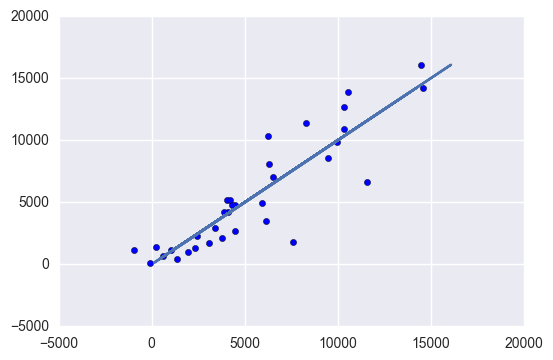

In [194]:
#regression for city - Lasso
y = city_y
X = city_X
lm = linear_model.Lasso()

model_cityL = lm.fit(X,y)
predict_cityL = model_cityL.predict(X)
plt.scatter(predict_cityL,y)
plt.plot(y,y)
print model_cityL.coef_
print model_cityL.score(X,y)
print mean_squared_error(y,predict_cityL)
#plt.scatter(predict,predict-y)
#delta = (y - pd.Series(predict_cityL))
#city_df_top12['Predict'] = pd.Series(predict_city)
#city_df_top12['Delta'] = delta
#county_df.sort_values('Delta',ascending = False)
#plt.scatter(y,predict-y)
#city_df_top12.sort_values('Delta',ascending = False)

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.